In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
from scipy.stats import norm
import matplotlib
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


def plot_diff( result_name, tree, baseline, method, resolution, depth ):
    f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
    f.set_size_inches(h=5, w=20)

    diff = tree - baseline
    
    mean, sigma = stats.norm.fit(diff[:][0])
    n, bins, patches = ax1.hist(diff[:][0], bins=60, label="r", density=True)
#    ax1.set_xlim(-5*sigma, 5*sigma)
#    ax1.set_ylim(0, np.max(n)*1.1)
    ax1.set_title(r"Distribution of error in $r$")

    gaussian = stats.norm.pdf(bins, mean, sigma)
    ax1.plot(bins, gaussian, "r-", label=r"Gaussian $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    
    mean, sigma = stats.laplace.fit(diff[:][0])
    laplace = stats.laplace.pdf(bins, mean, sigma)
    ax1.plot(bins, laplace, "k-", label=r"Laplace $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    ax1.legend()

    
    mean, sigma = stats.norm.fit(diff[:][1])
    n, bins, patches = ax2.hist(diff[:][1], bins=60, label="theta", density=True)
#    ax2.set_xlim(-.45e-11,0.45e-11)
#    ax2.set_ylim(0, 1e4)
    ax2.set_title(r"Distribution of error in $\theta$")
        
    gaussian = stats.norm.pdf(bins, mean, sigma)
    ax2.plot(bins, gaussian, "r-", label=r"Gaussian $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    
    mean, sigma = stats.laplace.fit(diff[:][1])
    laplace = stats.laplace.pdf(bins, mean, sigma)
    ax2.plot(bins, laplace, "k-", label=r"Laplace $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    ax2.legend()

    rms_r = sqrt(mean_squared_error(tree[:][0], baseline[:][0]))
    rms_t = sqrt(mean_squared_error(tree[:][1], baseline[:][1]))

    plt.suptitle( r"%s: method=%s resolution=%s depth=%s rmse($r$)=%.3e, rmse($\theta$)=%.3e" % ( result_name, method, resolution, depth, rms_r, rms_t ) )

    plt.show()


def plot_gfig( fig, ax, values, zmin, zmax ):

   # generate 2 2d grids for the x & y bounds
    y, x = np.mgrid[0:128,0:256]

    g = values.values.reshape((128,256))

    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = g[:-1, :-1]
    #levels = MaxNLocator(nbins=200).tick_values(z.min(), z.max())
    levels = MaxNLocator(nbins=200).tick_values(zmin, zmax )

    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('bwr')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    #im = ax.pcolormesh(x, y, z, cmap=cmap, norm=norm)
    im = ax.pcolormesh(g, cmap=cmap, norm=norm)
    fig.colorbar(im, ax=ax)

def plot_g( result_name, tree, method, resolution, depth ):

    fig, (ax0, ax1) = plt.subplots(ncols=2)
    fig.set_size_inches(h=5, w=20)

    plot_gfig(fig, ax0, tree[0], -12, 12 )
    ax0.set_title(r"$g_r$ %s: method=%s resolution=%s depth=%s" % ( result_name, method, resolution, depth ))

    plot_gfig(fig, ax1, tree[1], -2, 2)
    ax1.set_title(r"$g_\theta$ %s: method=%s resolution=%s depth=%s" % ( result_name, method, resolution, depth))

    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()

    plt.show()
    
   


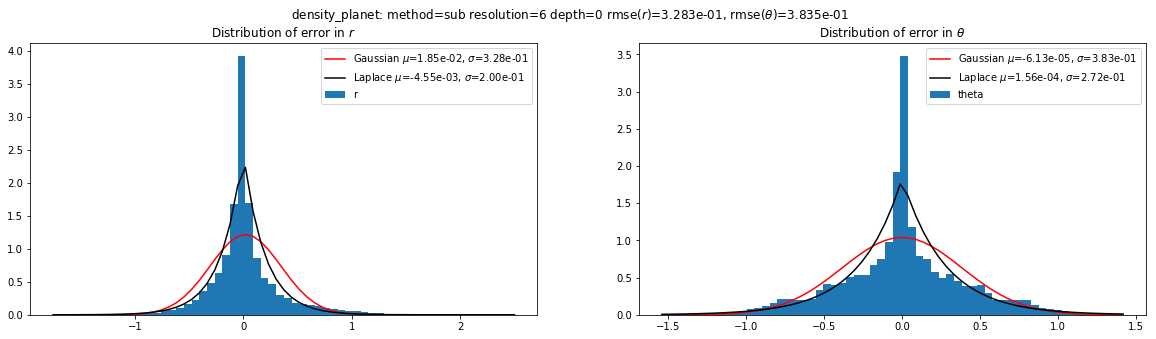

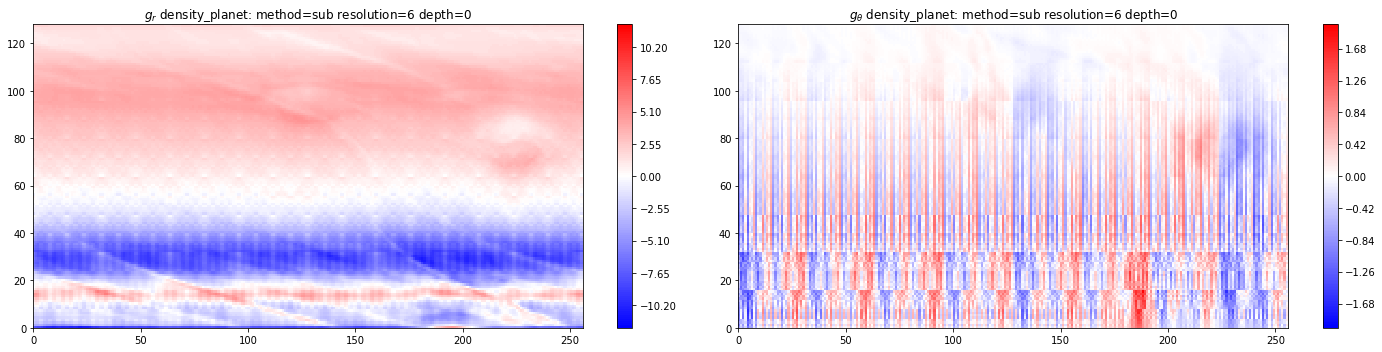

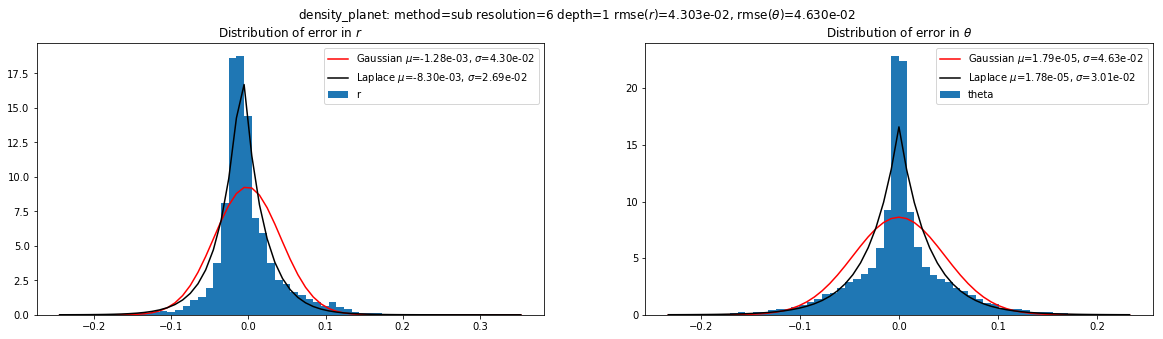

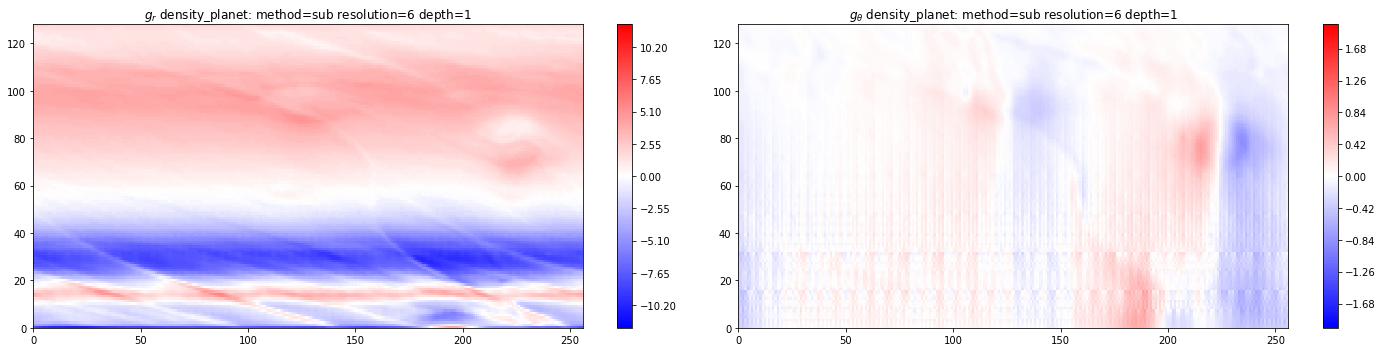

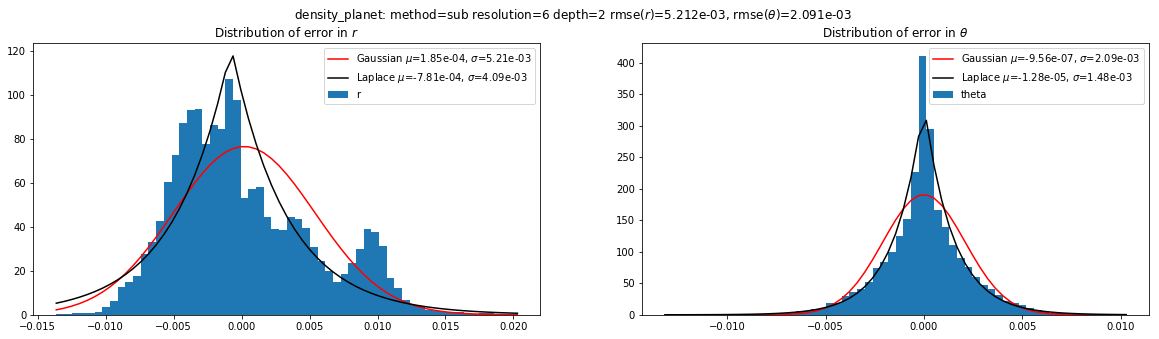

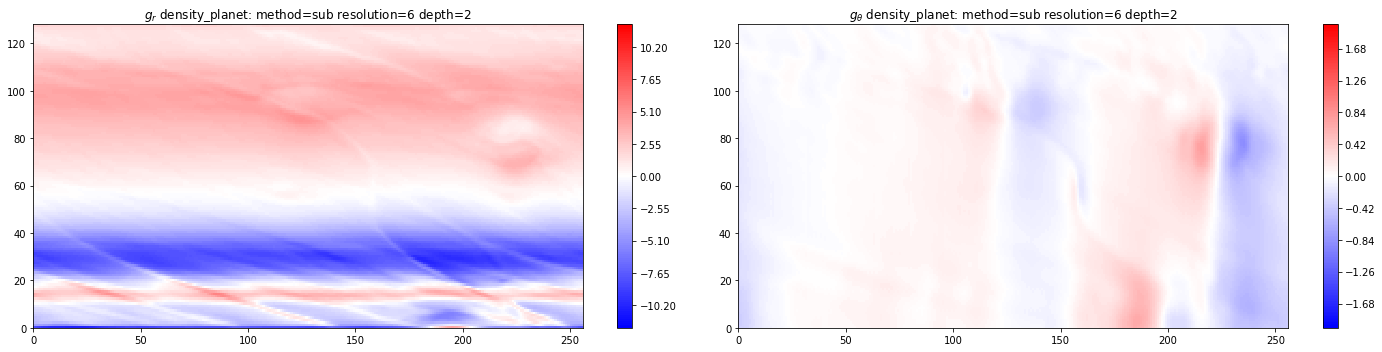

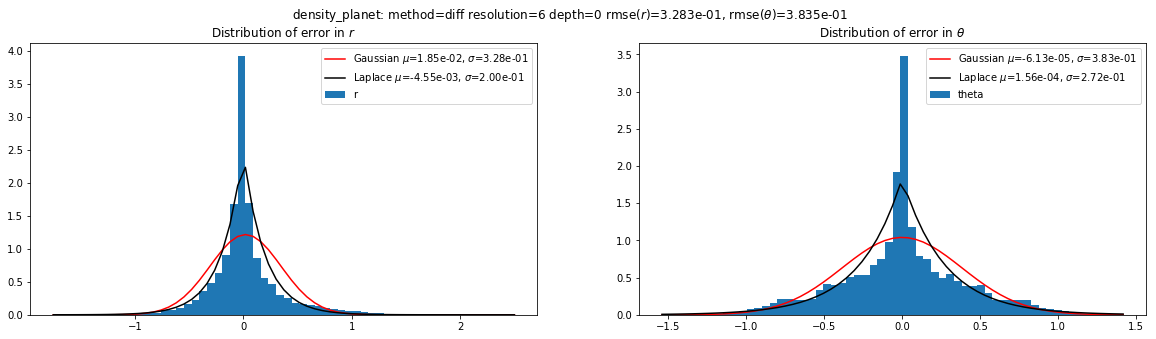

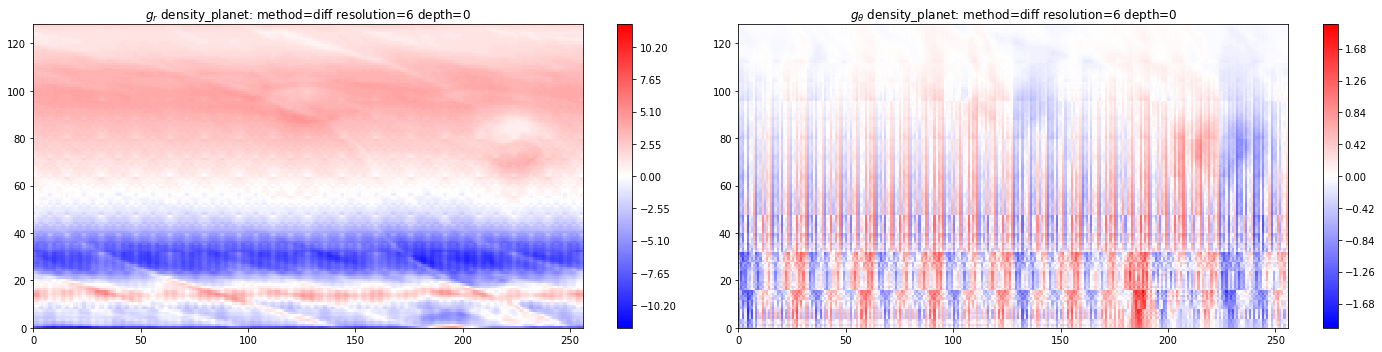

ValueError: max must be larger than min in range parameter.

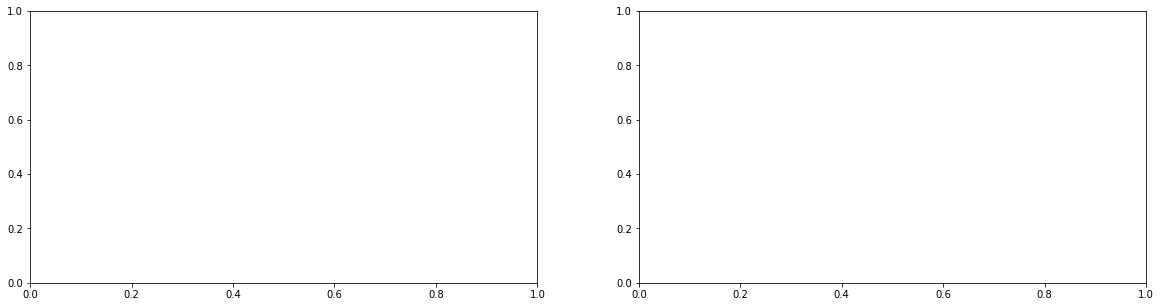

In [38]:
baseline_density = "../cmake-build-debug/result-density-20180704192455/diff-0-0.csv"
baseline_density_planet = "../cmake-build-debug/result-density_planet-20180704192455/diff-0-0.csv"
baseline_density_final_05k = "../cmake-build-debug/result-density_final_05k-20180703174346/sub-1-0.csv"

baseline = pd.read_csv( baseline_density_planet, header=None)
result_date = "20180710002351"
result_name = "density_planet"
for method in ['sub', 'diff']:
    for resolution in [6]:
        for depth in [0,1,2]:
            tree = pd.read_csv( "../cmake-build-debug/result-%s-%s/%s-%d-%d.csv" % (result_name, result_date, method, resolution, depth), header=None)
            plot_diff(result_name, tree, baseline, method, resolution, depth )
            plot_g(result_name, tree, method, resolution, depth)


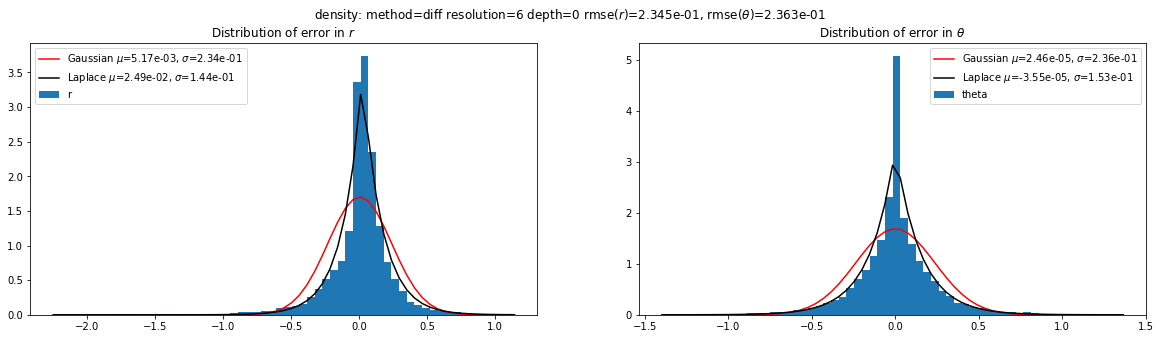

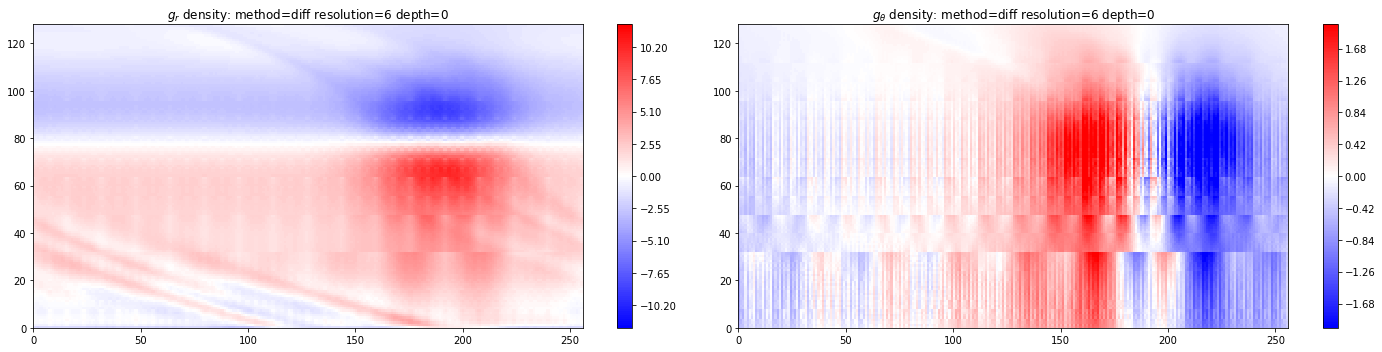

ValueError: max must be larger than min in range parameter.

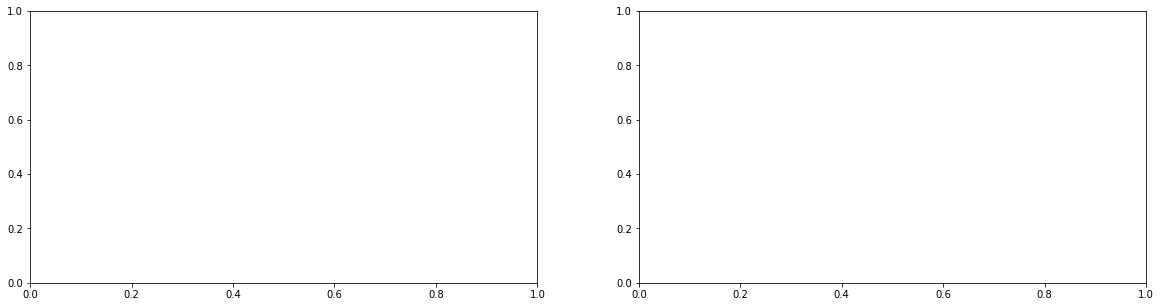

In [39]:
baseline_density = "../cmake-build-debug/result-density-20180704205144/diff-0-0.csv"
baseline_density_planet = "../cmake-build-debug/result-density_planet-20180704192455/diff-0-0.csv"
baseline_density_final_05k = "../cmake-build-debug/result-density_final_05k-20180703174346/sub-1-0.csv"

baseline = pd.read_csv( baseline_density, header=None)

result_date = "20180710002332"
result_name = "density"

for method in ['diff', 'sub']:#['sub', 'diff']:
    for resolution in [6]:
        for depth in [0,1,2]:
            tree = pd.read_csv( "../cmake-build-debug/result-%s-%s/%s-%d-%d.csv" % (result_name, result_date, method, resolution, depth), header=None)
            plot_diff(result_name, tree, baseline, method, resolution, depth )
            plot_g(result_name, tree, method, resolution, depth)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0.5, 1.15, 0.01)
Y = np.arange(0, 2*np.pi, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 1 + (np.exp(X) * (np.exp(X) - (2*np.cos(Y))))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 20)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()